### The Ideal Diesel Cycle

An ideal Diesel cycle with air as the working fluid has a compression ratio of $r = 18$ and a cutoff ratio of $r_c = 2$.
At the beginning of the compression process, the working fluid is at 101325 Pa, 26.7°C, and 1,917 cm$^3$.

Utilizing the cold-air-standard assumptions, determine: 

- (a) the temperature and pressure of air at the end of each process, 
- (b) the net work output and the thermal efficiency, and 
- (c) compare your answer in part (b) by using table values instead of the cold air assumption
- (d) compare your value in (b) with that for the formula: $\eta = 1 - \frac{1}{r^{k-1}}\left[\frac{r_c^k -1}{k(r_c - 1)} \right] $

Recall, that the Diesel cycle consists of the following processes:
- 1-2 isentropic compression
- 2-3 isobaric heating
- 3-4 isentropic expansion
- 4-1 isochoric cooling

In [12]:
!pip install CoolProp

In [13]:
from CoolProp.CoolProp import PropsSI

In [14]:
fluid = 'air'
R_JperKgperK = 287.052874

In [71]:
T0_K = 273.15+25
p0_Pa = 101325

cv_JperKgPerK = PropsSI('O','P',p0_Pa,'T',T0_K,fluid)#; print(cv_JperKgPerK)
cp_JperKgPerK = PropsSI('C','P',p0_Pa,'T',T0_K,fluid)#; print(cp_JperKgPerK) 
k = cp_JperKgPerK/cv_JperKgPerK

r = 18
rc = 2

In [60]:
# state 1
V1_m3 = 1917/1000/1000
T1_K = 26.7+273.15
p1_Pa = 101325

h1_JperKg = PropsSI('H','P',p1_Pa,'T',T1_K,fluid)
u1_JperKg = PropsSI('U','P',p1_Pa,'T',T1_K,fluid)
s1_JperKgPerK = PropsSI('S','P',p1_Pa,'T',T1_K,fluid)
rho1_kgPerM3 = PropsSI('D','P',p1_Pa,'T',T1_K,fluid)

The compression ratio is defined as the ratio of the volumes before and after compression:

$$V_2 = V_1/r$$

In [26]:
# state 2
V2_m3 = V1_m3/r

### Part (a)

#### Process 1-2: isentropic compression of an ideal gas

Recalling our TdS relations for an ideal gas assuming that the process is isentropic, we can use the  following equations:

$$T_2 = T_1 \left(\frac{V_1}{V_2} \right)^{k-1} $$
$$p_2 = p_1 \left(\frac{V_1}{V_2} \right)^{k} $$

In [44]:
T2_K = T1_K*((V1_m3/V2_m3)**(k-1))
p2_Pa = p1_Pa*((V1_m3/V2_m3)**k)

print('(a) T2: {0:1.1f} K'.format(T2_K))
print('(a) p2: {0:1.1f} Pa'.format(p2_Pa))

(a) T2: 957.7 K
(a) p2: 5825260.0 Pa


We can also get these values using CoolProp as:

In [45]:
rho2_kgPerM3 = rho1_kgPerM3*r
s2_JperKgPerK = s1_JperKgPerK
h2_JperKg = PropsSI('H','D',rho2_kgPerM3,'S',s2_JperKgPerK,fluid)

T2_K_ = PropsSI('T','D',rho2_kgPerM3,'S',s2_JperKgPerK,fluid) 
p2_Pa_ = PropsSI('P','D',rho2_kgPerM3,'S',s2_JperKgPerK,fluid) 

print('(a) CoolProp: T2: {0:1.1f} K'.format(T2_K_))
print('(a) CoolProp: p2: {0:1.1f} Pa'.format(p2_Pa_))

(a) CoolProp: T2: 905.3 K
(a) CoolProp: p2: 5612521.1 Pa


#### Process 2-3: constant-pressure heat addition to an ideal gas

$$p_3 = p_2 $$

Using the ideal gas equation, it can be shown that:

$$T_3 = T_2 \left( \frac{V_3}{V_2} \right) $$

We can also use the cutoff ratio, which is defined as:

$$V_3 = r_c V_2 $$

In [46]:
p3_Pa = p2_Pa
V3_m3 = rc*V2_m3

T3_K = T2_K *(V3_m3/V2_m3)

print('(a) T3: {0:1.1f} K'.format(T3_K))
print('(a) p3: {0:1.1f} Pa'.format(p3_Pa))

(a) T3: 1915.4 K
(a) p3: 5825260.0 Pa


Can also determine the properties using CoolProp:

In [67]:
rho3_kgPerM3 = rho2_kgPerM3/rc
T3_K_ = PropsSI('T','D',rho3_kgPerM3,'P',p3_Pa,fluid) 
s3_JperKgPerK = PropsSI('S','D',rho3_kgPerM3,'P',p3_Pa,fluid) 
h3_JperKg = PropsSI('H','D',rho3_kgPerM3,'P',p3_Pa,fluid)

print('(c) CoolProp: T3: {0:1.1f} K'.format(T3_K_))
print('(c) CoolProp: p3: {0:1.1f} Pa'.format(p3_Pa))

(c) CoolProp: T3: 1894.4 K
(c) CoolProp: p3: 5825260.0 Pa


#### Process 3-4: isentropic expansion of an ideal gas

$$T_4 = T_3 \left(\frac{V_3}{V_4} \right)^{k-1} $$
$$p_4 = p_3 \left(\frac{V_3}{V_4} \right)^{k} $$

In [51]:
V4_m3 = V1_m3

T4_K = T3_K*((V3_m3/V4_m3)**(k-1))
p4_Pa = p3_Pa*((V3_m3/V4_m3)**k)

print('(a) T4: {0:1.1f} K'.format(T4_K))
print('(a) p4: {0:1.1f} Pa'.format(p4_Pa))

(a) T4: 792.3 K
(a) p4: 267725.9 Pa


Using CoolProp:

In [68]:
s4_JperKgPerK = s3_JperKgPerK
rho4_kgPerM3 = rho1_kgPerM3

h4_JperKg = PropsSI('H','D',rho4_kgPerM3,'S',s4_JperKgPerK,fluid)
u4_JperKg = PropsSI('U','D',rho4_kgPerM3,'S',s4_JperKgPerK,fluid)
T4_K_ = PropsSI('T','D',rho4_kgPerM3,'S',s4_JperKgPerK,fluid)
p4_Pa_ = PropsSI('P','D',rho4_kgPerM3,'S',s4_JperKgPerK,fluid)

print('(c) CoolProp: T4: {0:1.1f} K'.format(T4_K_))
print('(c) CoolProp: p4: {0:1.1f} Pa'.format(p4_Pa_))

(c) CoolProp: T4: 939.4 K
(c) CoolProp: p4: 317867.5 Pa


-------

### Part (b)



In [55]:
m_Kg = p1_Pa*V1_m3/(R_JperKgperK*T1_K); print(m_Kg)

0.002256694511697038


The heat transferred in is:

$$Q_\text{in} = m (h_3 - h_2) $$

Assuming ideal gas:

$$Q_\text{in} = m c_p (T_3 - T_2) $$


In [57]:
Qin_J = m_Kg*cp_JperKgPerK*(T3_K - T2_K); print(Qin_J)

2174.8735343825624


In [72]:
# using CoolProp
Qin_J_ = m_Kg*(h3_JperKg - h2_JperKg); print(Qin_J_)

2672.2129109028183


The heat transferred out is:

$$Q_\text{out} = m (u_4 - u_1) $$

Assuming ideal gas:

$$Q_\text{out} = m c_v (T_4 - T_1) $$

In [61]:
Qout_J = m_Kg*cv_JperKgPerK*(T4_K - T1_K); print(Qout_J)

797.7579521154977


In [73]:
# using CoolProp
Qout_J_ = m_Kg*(u4_JperKg - u1_JperKg); print(Qout_J_)

1114.3732534876249


Recall for a cycle that:

$$W_\text{net} = Q_\text{in} - Q_\text{out} $$

In [64]:
Wnet_J = Qin_J - Qout_J
print('(b) Wnet: {0:1.1f} J'.format(Wnet_J))

(b) Wnet: 1377.1 J


In [74]:
# using CoolProp
Wnet_J_ = Qin_J_ - Qout_J_
print('(c) CoolProp: Wnet: {0:1.1f} J'.format(Wnet_J_))

(c) CoolProp: Wnet: 1557.8 J


The thermal efficiency is then:

In [69]:
eta_th = Wnet_J/Qin_J
eta_th_ = Wnet_J_/Qin_J_

print('(b) eta_th: {0:1.1f} %'.format(eta_th*100))
print('(c) CoolProp: eta_th_: {0:1.1f} %'.format(eta_th_*100))

(b) eta_th: 63.3 %
(c) CoolProp: eta_th_: 58.3 %


-------

### Part (d)

In [75]:
eta_th_Diesel = 1 - (1/(r**(k-1)))*(((rc**k) - 1)/(k*(rc - 1)))
print('(d) eta_th_Diesel: {0:1.1f} %'.format(eta_th_Diesel*100))

(d) eta_th_Diesel: 63.3 %


________


In [76]:
import numpy as np
import matplotlib.pyplot as plt

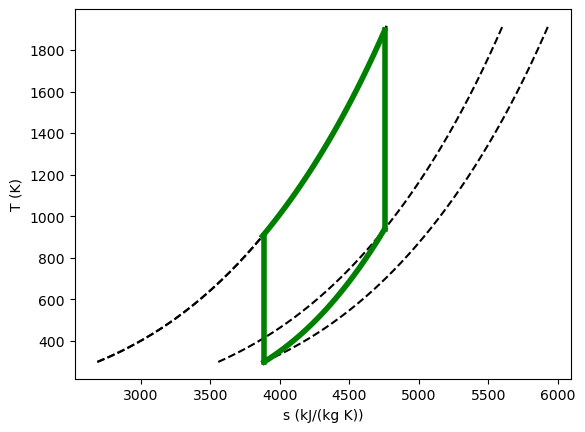

In [90]:
plt.figure()
plt.clf()
T = np.linspace(T1_K, T3_K, 200) # range of temperatures
for P in [p1_Pa, p2_Pa, p3_Pa, p4_Pa_]: #MPa
    # S = [IAPWS97(T=t, P=P) for t in T]
    S = [PropsSI('S','T',t,'P',P,fluid) for t in T]
    #S = [s.s for s in steam]
    plt.plot(S, T, 'k--')

plt.xlabel('s (kJ/(kg K))')
plt.ylabel('T (K)')

# Path 1 to 2 is isentropic
plt.plot([s1_JperKgPerK, s2_JperKgPerK], [T1_K, T2_K_], 'g-', lw=4) 

# path from 2 to 3 is isobaric
T23 = np.linspace(T2_K_, T3_K_)
S23 = [PropsSI('S','T',t,'P',p2_Pa,fluid) for t in T23]
plt.plot(S23, T23, 'g-', lw=4) 

# path from 3 to 4 is isentropic
plt.plot([s3_JperKgPerK, s4_JperKgPerK], [T3_K_, T4_K_], 'g-', lw=4) 

# path from 4 to 1 is isochoric
T41 = np.linspace(T1_K, T4_K_)
S41 = [PropsSI('S','T',t,'D',rho4_kgPerM3,fluid) for t in T41]
plt.plot(S41, T41, 'g-', lw=4) 

plt.savefig('dieselIdealCycle-T-s-diagram.png')